### Type of SQL Commands

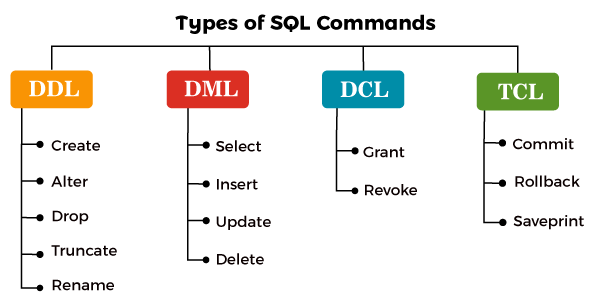

In [116]:
import mysql.connector

mydb = mysql.connector.connect(host='localhost',user='root',passwd='007@nkiT') # other parameter: database='database_name'

mycursor = mydb.cursor()

mycursor.execute('CREATE DATABASE IF NOT EXISTS my_schema')

In [117]:
mycursor.execute('SHOW DATABASES')

for i in mycursor:
    print(i)

('information_schema',)
('my_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


In [118]:
import mysql.connector

mydb = mysql.connector.connect(host='localhost',user='root',passwd='007@nkiT', database='my_schema') # other parameter: database='database_name'

mycursor = mydb.cursor()

TableName = "CREATE TABLE users(user_id INTEGER,name VARCHAR(255),email VARCHAR(255),password VARCHAR(255));"
 
mycursor.execute(TableName)

**Data manually added to the database in this case**

In [119]:
mycursor.execute('SELECT * FROM users')
for i in mycursor:
    print(i)

(1, 'Himanshu ', 'him@mail.com', 'sdfdsf')
(2, 'Rohan', 'rao@mail.com', 'edew')


In [120]:
mycursor.execute('DROP DATABASE my_schema')

In [121]:
mycursor.execute('SHOW DATABASES')

for i in mycursor:
    print(i)

('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


#### Some queries to remove table: 

- `TRUNCATE TABLE users` -> doesn't delete structure of the table
- `DROP TABLE IF EXISTS users`

#### Data Integrity
Ensures that the data in a database is protected from errors, corruption, or unauthorized changes.

There are various methods used to ensure data integrity:

- `Constraints` : Rules or conditions that must be met for data to be inserted, updated, or deleted in a database table.
- `Transactions` : A sequence of database operations that are treated as a single unit of work.
- `Normalization` : A design technique that minimizes data redundancy and data consistency by organising data into separate tables.

#### Constraints in MySQL:
1. NOT NULL
2. UNIQUE (combo) -> another way of creating constraint
3. PRIMARY KEY
4. AUTO INCREMENT
5. CHECK
6. DEFAULT
7. FOREIGN KEY

**Referential Actions**
1. RESTRICT
2. CASCADE
3. SET NULL
4. SET DEFAULT 

In [122]:
mydb = mysql.connector.connect(host='localhost',user='root',passwd='007@nkiT')

mycursor = mydb.cursor()

mycursor.execute('CREATE DATABASE IF NOT EXISTS mydatabase')

In [123]:
mycursor.execute('SHOW DATABASES')

for i in mycursor:
    print(i)

('information_schema',)
('mydatabase',)
('mysql',)
('performance_schema',)
('sys',)


In [124]:
mydb = mysql.connector.connect(host='localhost',user='root',passwd='007@nkiT', database='mydatabase')

mycursor = mydb.cursor()

TableName = "CREATE TABLE users(user_id INTEGER NOT NULL,name VARCHAR(255) NOT NULL,email VARCHAR(255),password VARCHAR(255));"
 
mycursor.execute(TableName)

In [125]:
# UNIQUE : The value cannot be same 

In [126]:
mycursor.execute('DROP TABLE users')

In [127]:
TableName = "CREATE TABLE users(user_id INTEGER NOT NULL,name VARCHAR(255) NOT NULL,email VARCHAR(255) NOT NULL UNIQUE,password VARCHAR(255) NOT NULL);"
 
mycursor.execute(TableName)

In [128]:
mycursor.execute('DROP TABLE users')

In [129]:
# ALTERNATE WAY TO APPLY CONSTRAINTS : CONSTRAINT user_email_unique UNIQUE(email) -> used when I want something like: I want name and email combination to be unique, independently name and email can be same but not their combination

TableName = "CREATE TABLE users(user_id INTEGER NOT NULL,name VARCHAR(255) NOT NULL,email VARCHAR(255),password VARCHAR(255) NOT NULL, CONSTRAINT user_email_unique UNIQUE(email));"
 
mycursor.execute(TableName) 

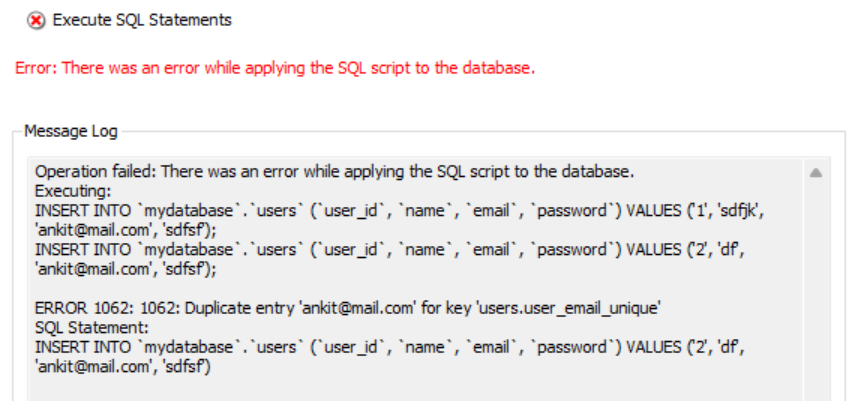

In [130]:
mycursor.execute('DROP TABLE users')

In [131]:
TableName = "CREATE TABLE users(user_id INTEGER NOT NULL,name VARCHAR(255) NOT NULL,email VARCHAR(255),password VARCHAR(255) NOT NULL, CONSTRAINT user_name_email_unique UNIQUE(name,email));"
# Combination of name and email cannot repeat.
# This also give flexibility to re-adjust the constraints(by simply deleting the constraints) without deleting the table
mycursor.execute(TableName) 

In [132]:
mycursor.execute('DROP TABLE users')

#### PRIMARY KEY

In [133]:
# FIRST WAY
TableName = "CREATE TABLE users(user_id INTEGER NOT NULL PRIMARY KEY,name VARCHAR(255) NOT NULL,email VARCHAR(255),password VARCHAR(255) NOT NULL, CONSTRAINT user_name_email_unique UNIQUE(name,email));"
mycursor.execute(TableName) 

In [134]:
mycursor.execute('DROP TABLE users')

In [135]:
# SECOND WAY
TableName = "CREATE TABLE users(user_id INTEGER NOT NULL, name VARCHAR(255) NOT NULL,email VARCHAR(255),password VARCHAR(255) NOT NULL, CONSTRAINT user_name_email_unique UNIQUE(name,email),CONSTRAINT user_pk PRIMARY KEY(user_id));"
mycursor.execute(TableName) 

In [136]:
mycursor.execute('DROP TABLE users')

In [137]:
# AUTO_INCREMENT

TableName = "CREATE TABLE users(user_id INTEGER PRIMARY KEY AUTO_INCREMENT, name VARCHAR(255) NOT NULL,email VARCHAR(255) NOT NULL UNIQUE,password VARCHAR(255) NOT NULL);"
mycursor.execute(TableName) 

In [138]:
mycursor.execute('DROP TABLE users')

In [139]:
# CHECK : 2 WAYS

TableName = "CREATE TABLE students(student_id INTEGER PRIMARY KEY AUTO_INCREMENT, name VARCHAR(50) NOT NULL, age INTEGER CHECK(age>6 AND age<25), CONSTRAINT student_age_check CHECK(age>6 AND age<25));"
mycursor.execute(TableName) 

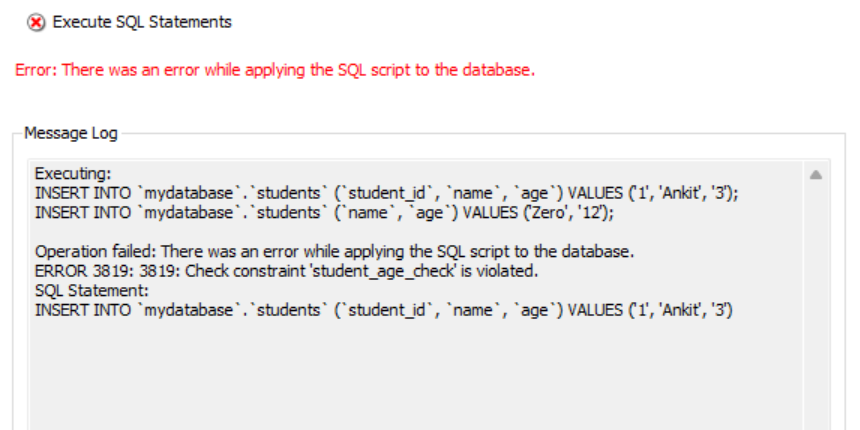

In [140]:
mycursor.execute('DROP TABLE students')

In [102]:
TableName = "CREATE TABLE ticket(ticket_id INTEGER PRIMARY KEY AUTO_INCREMENT, name VARCHAR(50) NOT NULL, travel_date DATETIME DEFAULT CURRENT_TIMESTAMP);"
mycursor.execute(TableName) 

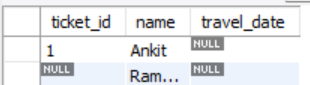

In [88]:
mycursor.execute('SELECT * FROM ticket')
for i in mycursor:
    print(i)

(1, 'Ankit', datetime.datetime(2024, 5, 5, 22, 59, 56))
(2, 'Ramesh', datetime.datetime(2024, 5, 5, 22, 59, 56))


In [103]:
mycursor.execute('DROP TABLE ticket')

#### FOREIGN KEY

In [158]:
TableName = "CREATE TABLE customers(cid INTEGER PRIMARY KEY AUTO_INCREMENT, name VARCHAR(50) NOT NULL, email VARCHAR(50) NOT NULL UNIQUE);"
mycursor.execute(TableName) 

In [107]:
TableName = "CREATE TABLE orders(order_id INTEGER PRIMARY KEY AUTO_INCREMENT, cid INTEGER, order_date DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP, CONSTRAINT orders_fk FOREIGN KEY (cid) REFERENCES customers(cid));"
mycursor.execute(TableName) 

In [108]:
mycursor.execute('DROP TABLE customers')

DatabaseError: 3730 (HY000): Cannot drop table 'customers' referenced by a foreign key constraint 'orders_fk' on table 'orders'.

In [156]:
mycursor.execute('DROP TABLE orders')

In [157]:
mycursor.execute('DROP TABLE customers')

#### REFERENTIAL ACTION
If two tables are related via a foreign key, then after applying delete and update how will one table respond to the other is determined by referential action. By default RESTRICT (what we saw above)

In [144]:
# CASCADE : Both the tables will have same operation
# SET NULL : Delete from one table, other table value will automatically set to null
# SET DEFAULT : Delete from one table, other table value will automatically set to default value

In [159]:
TableName = "CREATE TABLE orders(order_id INTEGER PRIMARY KEY AUTO_INCREMENT, cid INTEGER NOT NULL, order_date DATETIME NOT NULL DEFAULT CURRENT_TIMESTAMP, CONSTRAINT orders_fk FOREIGN KEY (cid) REFERENCES customers(cid) ON DELETE CASCADE ON UPDATE CASCADE);"
mycursor.execute(TableName) 

#### ALTER TABLE
Used to modify the structure of an existing table. You can 
1. Add Columns
2. Delete Columns
3. Modify Columns

In [160]:
mycursor.execute("ALTER TABLE customers ADD COLUMN password VARCHAR(50) NOT NULL")

In [161]:
# AFTER
mycursor.execute("ALTER TABLE customers ADD COLUMN surname VARCHAR(50) NOT NULL AFTER name")

In [162]:
mycursor.execute("ALTER TABLE customers DROP COLUMN surname")

In [164]:
# MODIFY
mycursor.execute("ALTER TABLE customers MODIFY COLUMN password INTEGER")